In [1]:
from importlib import reload
import sys
sys.path.insert(1,"/home/bsdz/git/typetheory")
from typetheory.expressions import Symbol, ArityArrow, ArityCross, A0
from typetheory.definitions.operators import plus, mult
from typetheory.definitions.integrals import integral, sum_
from typetheory.definitions.variables import x, y, z, a, b
from typetheory.natural import NaturalNumber

f = Symbol('f(x)')

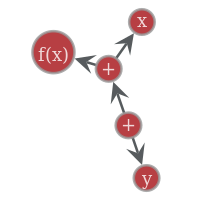

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff83bd6df98>

In [2]:
plus(plus(x, f),y).repr_graphtool()

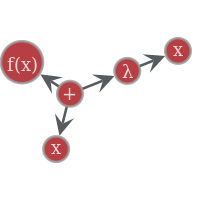

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff8252a7940>

In [3]:
plus(x, f).abstract(x).repr_graphtool()

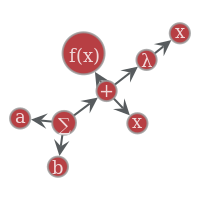

<Graph object, directed, with 8 vertices and 7 edges at 0x7ff8252acb00>

In [4]:
sum_(plus(x, f).abstract(x), a,b).repr_graphtool()

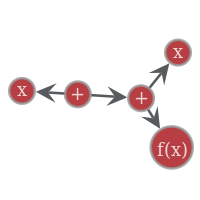

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff8252ada90>

In [5]:
plus.apply(x,plus(x, f)).repr_graphtool()

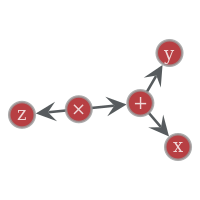

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff8252b18d0>

In [6]:
gexpr = mult(z,plus(x, y)).repr_graphtool()
gexpr

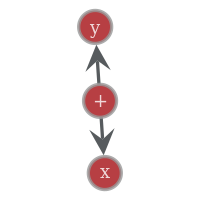

<Graph object, directed, with 3 vertices and 2 edges at 0x7ff8252b16d8>

In [7]:
hexpr = plus(x, y).repr_graphtool()
hexpr

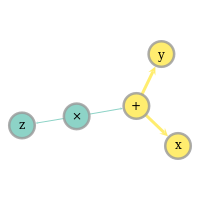

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ff8252b18d0, at 0x7ff8782e99e8>

In [8]:
from graph_tool.topology import subgraph_isomorphism, mark_subgraph
from graph_tool.draw import graph_draw
vertex_maps = subgraph_isomorphism(hexpr, gexpr, max_n=100, vertex_label=(hexpr.vp["label"],gexpr.vp["label"]))

for i, vm in enumerate(vertex_maps):
   gexpr.set_vertex_filter(None)
   gexpr.set_edge_filter(None)
   vmask, emask = mark_subgraph(gexpr, hexpr, vm)
   gexpr.set_vertex_filter(vmask)
   gexpr.set_edge_filter(emask)

gexpr.set_vertex_filter(None)
gexpr.set_edge_filter(None)
ewidth = gexpr.copy_property(emask, value_type="double")
ewidth.a += 0.5
ewidth.a *= 2
graph_draw(gexpr, 
           vertex_text=gexpr.vp["label"],
           vertex_fill_color=vmask, 
           edge_color=emask,
           edge_pen_width=ewidth, 
           output_size=(200, 200),              
           output="test.png")
